In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility


/Users/online1/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
# network and training
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

In [3]:
# data : shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_test)

(60000, 28, 28)
[7 2 1 ... 4 5 6]


In [4]:
RESHAPED = 28*28
X_train = x_train.reshape(60000, RESHAPED)
X_test = x_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize 
X_train /= 255 # image max intensity is 255
X_test /= 255
print(X_train.shape[0], 'train_samples')
print(X_test.shape[0], 'test samples')

60000 train_samples
10000 test samples


In [5]:
# vonvert class vectors to binary class matrics
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
print(Y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
#model compilation
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [13]:
#model fit
history = model.fit(X_train, Y_train,
                   batch_size= BATCH_SIZE, epochs=NB_EPOCH,
                   verbose=VERBOSE, validation_split = VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 22us/step - loss: 1.3778 - acc: 0.6692 - val_loss: 0.8900 - val_acc: 0.8296
Epoch 2/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.7886 - acc: 0.8293 - val_loss: 0.6538 - val_acc: 0.8582
Epoch 3/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.6403 - acc: 0.8506 - val_loss: 0.5596 - val_acc: 0.8698
Epoch 4/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.5688 - acc: 0.8611 - val_loss: 0.5068 - val_acc: 0.8788
Epoch 5/200
48000/48000 [==============================] - 1s 20us/step - loss: 0.5251 - acc: 0.8684 - val_loss: 0.4733 - val_acc: 0.8833
Epoch 6/200
48000/48000 [==============================] - 1s 26us/step - loss: 0.4952 - acc: 0.8727 - val_loss: 0.4493 - val_acc: 0.8864
Epoch 7/200
48000/48000 [==============================] - 1s 22us/step - loss: 0.4730 - acc: 0.8768 - val_loss: 0.4314 - 

48000/48000 [==============================] - 1s 21us/step - loss: 0.3140 - acc: 0.9128 - val_loss: 0.3016 - val_acc: 0.9164
Epoch 60/200
48000/48000 [==============================] - 1s 20us/step - loss: 0.3133 - acc: 0.9133 - val_loss: 0.3011 - val_acc: 0.9164
Epoch 61/200
48000/48000 [==============================] - 1s 20us/step - loss: 0.3126 - acc: 0.9132 - val_loss: 0.3007 - val_acc: 0.9170
Epoch 62/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.3119 - acc: 0.9134 - val_loss: 0.3001 - val_acc: 0.9167
Epoch 63/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.3114 - acc: 0.9136 - val_loss: 0.2996 - val_acc: 0.9173
Epoch 64/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.3107 - acc: 0.9140 - val_loss: 0.2992 - val_acc: 0.9174
Epoch 65/200
48000/48000 [==============================] - 1s 20us/step - loss: 0.3101 - acc: 0.9140 - val_loss: 0.2987 - val_acc: 0.9169
Epoch 66/200
48000/48000 [==============

Epoch 118/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.2900 - acc: 0.9194 - val_loss: 0.2842 - val_acc: 0.9213
Epoch 119/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.2897 - acc: 0.9191 - val_loss: 0.2840 - val_acc: 0.9214
Epoch 120/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.2896 - acc: 0.9194 - val_loss: 0.2838 - val_acc: 0.9213
Epoch 121/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.2893 - acc: 0.9194 - val_loss: 0.2836 - val_acc: 0.9214
Epoch 122/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.2890 - acc: 0.9196 - val_loss: 0.2835 - val_acc: 0.9215
Epoch 123/200
48000/48000 [==============================] - 1s 20us/step - loss: 0.2888 - acc: 0.9195 - val_loss: 0.2833 - val_acc: 0.9217
Epoch 124/200
48000/48000 [==============================] - 1s 24us/step - loss: 0.2886 - acc: 0.9198 - val_loss: 0.2832 - val_acc: 0.9221
Epoch 125/200
48000/

48000/48000 [==============================] - 1s 18us/step - loss: 0.2791 - acc: 0.9226 - val_loss: 0.2771 - val_acc: 0.9234
Epoch 177/200
48000/48000 [==============================] - 1s 19us/step - loss: 0.2790 - acc: 0.9225 - val_loss: 0.2770 - val_acc: 0.9242
Epoch 178/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.2788 - acc: 0.9228 - val_loss: 0.2770 - val_acc: 0.9236
Epoch 179/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.2787 - acc: 0.9228 - val_loss: 0.2769 - val_acc: 0.9237
Epoch 180/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.2786 - acc: 0.9228 - val_loss: 0.2768 - val_acc: 0.9235
Epoch 181/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.2784 - acc: 0.9227 - val_loss: 0.2767 - val_acc: 0.9237
Epoch 182/200
48000/48000 [==============================] - 1s 18us/step - loss: 0.2783 - acc: 0.9229 - val_loss: 0.2766 - val_acc: 0.9237
Epoch 183/200
48000/48000 [=======

In [14]:
#model evaluation
score =model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score :", score[0])
print("Test accuracy : ", score[1])

10000/10000 [==============================] - 0s 20us/step
Test score : 0.277081135687232
Test accuracy :  0.9233


We have a baseline accuracy of 92.36% on training, 92.27% on validation, and 92.22% on the test. This is a good starting point, but we can certainly improve it. Let's see how.

## Improving the simple net in Keras with hidden layers
A first improvement is to add additional layers to our network. So, after the input layer, we have a first dense layer with the N_HIDDEN neurons and an activation function relu.

After the first hidden layer, we have a second hidden layer, again with the N_HIDDEN neurons, followed by an output layer with 10 neurons, each of which will fire when the relative digit is recognized.

In [15]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_______________________________

Let's run the code and see which result we get with this multilayer network. Not bad. By adding two hidden layers, we reached 94.50% on the training set, 94.63% on validation, and 94.41% on the test. This means that we gained an additional 2.2% accuracy on the test with respect to the previous network. However, we dramatically reduced the number of iterations from 200 to 20. That's good, but we want more.

## Further improving the simple net in Keras with dropout
Now our baseline is 94.50% on the training set, 94.63% on validation, and 94.41% on the test.
We decide to randomly drop with the dropout probability some of the values propagated inside our internal dense network of hidden layers. 

In [16]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# M_HIDDEN hidden layers 10 outputs
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
__________

48000/48000 [==============================] - 2s 44us/step - loss: 0.1865 - acc: 0.9452 - val_loss: 0.1283 - val_acc: 0.9613
Epoch 50/250
48000/48000 [==============================] - 2s 43us/step - loss: 0.1803 - acc: 0.9462 - val_loss: 0.1268 - val_acc: 0.9621
Epoch 51/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.1823 - acc: 0.9465 - val_loss: 0.1255 - val_acc: 0.9632
Epoch 52/250
48000/48000 [==============================] - 3s 54us/step - loss: 0.1795 - acc: 0.9459 - val_loss: 0.1245 - val_acc: 0.9632
Epoch 53/250
48000/48000 [==============================] - 2s 43us/step - loss: 0.1753 - acc: 0.9479 - val_loss: 0.1234 - val_acc: 0.9635
Epoch 54/250
48000/48000 [==============================] - 2s 46us/step - loss: 0.1739 - acc: 0.9477 - val_loss: 0.1221 - val_acc: 0.9636
Epoch 55/250
48000/48000 [==============================] - 2s 43us/step - loss: 0.1736 - acc: 0.9491 - val_loss: 0.1209 - val_acc: 0.9646
Epoch 56/250
48000/48000 [==============

Epoch 108/250
48000/48000 [==============================] - 2s 44us/step - loss: 0.1139 - acc: 0.9664 - val_loss: 0.0933 - val_acc: 0.9726
Epoch 109/250
48000/48000 [==============================] - 2s 37us/step - loss: 0.1146 - acc: 0.9658 - val_loss: 0.0933 - val_acc: 0.9733
Epoch 110/250
48000/48000 [==============================] - 2s 36us/step - loss: 0.1141 - acc: 0.9659 - val_loss: 0.0928 - val_acc: 0.9727
Epoch 111/250
48000/48000 [==============================] - 2s 37us/step - loss: 0.1146 - acc: 0.9658 - val_loss: 0.0927 - val_acc: 0.9724
Epoch 112/250
48000/48000 [==============================] - 2s 37us/step - loss: 0.1117 - acc: 0.9662 - val_loss: 0.0917 - val_acc: 0.9739
Epoch 113/250
48000/48000 [==============================] - 2s 37us/step - loss: 0.1127 - acc: 0.9658 - val_loss: 0.0921 - val_acc: 0.9732
Epoch 114/250
48000/48000 [==============================] - 2s 43us/step - loss: 0.1145 - acc: 0.9655 - val_loss: 0.0914 - val_acc: 0.9736
Epoch 115/250
48000/

48000/48000 [==============================] - 2s 43us/step - loss: 0.0863 - acc: 0.9731 - val_loss: 0.0848 - val_acc: 0.9764
Epoch 167/250
48000/48000 [==============================] - 2s 40us/step - loss: 0.0858 - acc: 0.9738 - val_loss: 0.0847 - val_acc: 0.9761
Epoch 168/250
48000/48000 [==============================] - 2s 39us/step - loss: 0.0838 - acc: 0.9747 - val_loss: 0.0843 - val_acc: 0.9761
Epoch 169/250
48000/48000 [==============================] - 2s 39us/step - loss: 0.0854 - acc: 0.9739 - val_loss: 0.0840 - val_acc: 0.9760
Epoch 170/250
48000/48000 [==============================] - 2s 39us/step - loss: 0.0872 - acc: 0.9735 - val_loss: 0.0834 - val_acc: 0.9762
Epoch 171/250
48000/48000 [==============================] - 2s 39us/step - loss: 0.0854 - acc: 0.9739 - val_loss: 0.0831 - val_acc: 0.9766
Epoch 172/250
48000/48000 [==============================] - 2s 39us/step - loss: 0.0846 - acc: 0.9737 - val_loss: 0.0833 - val_acc: 0.9763
Epoch 173/250
48000/48000 [=======

48000/48000 [==============================] - 2s 46us/step - loss: 0.0700 - acc: 0.9790 - val_loss: 0.0804 - val_acc: 0.9772
Epoch 225/250
48000/48000 [==============================] - 2s 43us/step - loss: 0.0674 - acc: 0.9791 - val_loss: 0.0806 - val_acc: 0.9776
Epoch 226/250
48000/48000 [==============================] - 2s 50us/step - loss: 0.0684 - acc: 0.9788 - val_loss: 0.0805 - val_acc: 0.9770
Epoch 227/250
48000/48000 [==============================] - 2s 39us/step - loss: 0.0668 - acc: 0.9793 - val_loss: 0.0808 - val_acc: 0.9772
Epoch 228/250
48000/48000 [==============================] - 2s 39us/step - loss: 0.0693 - acc: 0.9786 - val_loss: 0.0806 - val_acc: 0.9769
Epoch 229/250
48000/48000 [==============================] - 2s 39us/step - loss: 0.0688 - acc: 0.9785 - val_loss: 0.0806 - val_acc: 0.9770
Epoch 230/250
48000/48000 [==============================] - 2s 40us/step - loss: 0.0685 - acc: 0.9786 - val_loss: 0.0801 - val_acc: 0.9769
Epoch 231/250
48000/48000 [=======

So let's try to increase significantly the number of epochs up to 250, and we get 98.1% accuracy on training, 97.73% on validation, and 97.7% on the test:

## Using RMSprop optimizer on 20 epochs

In [18]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = RMSprop() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# M_HIDDEN hidden layers 10 outputs
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_11 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_12 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
__________

## Using RMSprop optimizer on 20 epochs


In [19]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# M_HIDDEN hidden layers 10 outputs
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_14 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_15 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
__________

In [42]:

import os 
from __future__ import print_function
import numpy as np
from keras.callbacks import ModelCheckpoint 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
MODEL_DIR = "../models"

NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# M_HIDDEN hidden layers 10 outputs
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

# save best model 
checkpoint = ModelCheckpoint( filepath=os.path.join(MODEL_DIR, "model-{epoch:02d}.h5")) 

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_36 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_37 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1290      
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


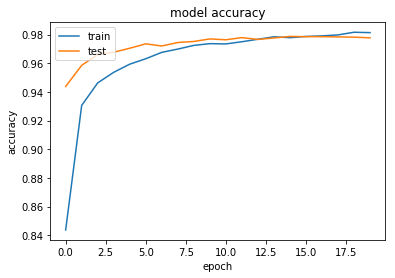

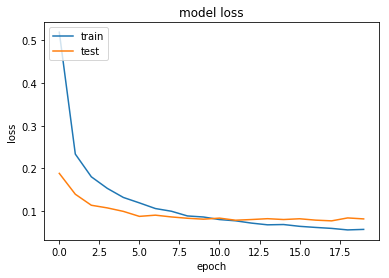

In [43]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Predicting output
When a net is trained, it can be course be used for predictions. In Keras, this is very simple. We can use the following method:

In [22]:
# calculate predictions
predictions = model.predict(X_test)